In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
import pandas

In [15]:
speed = [99, 96, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
generatedArray = np.random.uniform(0.0, 5.0, 250) #250 value array of values between 0 and 5

print(np.percentile(ages, 75)) #prints 43 because 75% of the people/values are 43 or younger/lower
print(generatedArray)
print("generatedArray Median =", np.median(generatedArray))
print("generatedArray Mode=", stats.mode(generatedArray))
print(np.percentile(generatedArray, 60))

43.0
[0.16332287 0.07101294 0.11668856 2.95999315 3.27511935 0.22802464
 3.67795327 4.68691107 2.11963498 1.19515995 1.56591401 0.91417034
 0.890865   3.85115455 2.68385208 4.29814811 2.99455354 0.5751579
 1.1770172  4.78791077 1.3729928  4.64431334 3.38966724 1.49502375
 1.13305157 2.28905876 4.46212187 3.93484778 4.97598945 1.78569596
 4.0482757  3.3388855  0.75426834 2.02412657 1.01278474 4.11468646
 2.43537395 2.4686189  4.39738323 0.76239449 3.98582348 2.94867379
 3.63088607 3.30939419 4.58812948 4.56547099 2.07061003 3.65016484
 0.97132739 2.73166307 0.88847959 2.4031664  1.43536004 2.54353629
 4.63969155 0.2993633  4.38684332 0.06809981 2.03626422 2.38564178
 1.99222901 3.35177494 0.43719069 0.97965933 1.22739835 4.84619549
 0.89348882 2.48137897 3.38910053 4.13999917 1.23233168 3.03323172
 3.60998811 3.12844859 0.20059966 3.45261558 1.93647778 0.2464082
 3.79252018 2.53585373 3.47430644 2.48431397 2.54952265 3.77029967
 4.97923253 2.53519353 3.00655974 1.46276982 0.53137265 0.0

C:\Users\fw2220\AppData\Local\Temp\ipykernel_7648\3966691943.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("generatedArray Mode=", stats.mode(generatedArray))


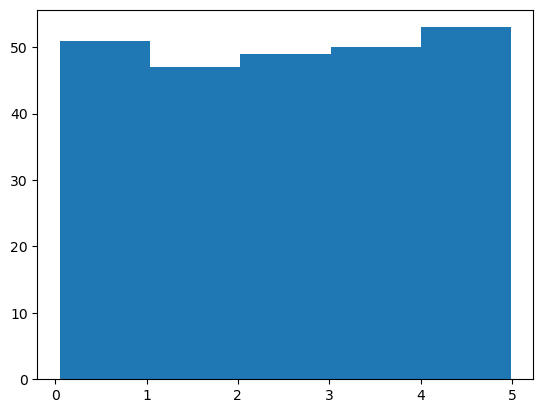

In [16]:
plt.hist(generatedArray, 5)
plt.show()

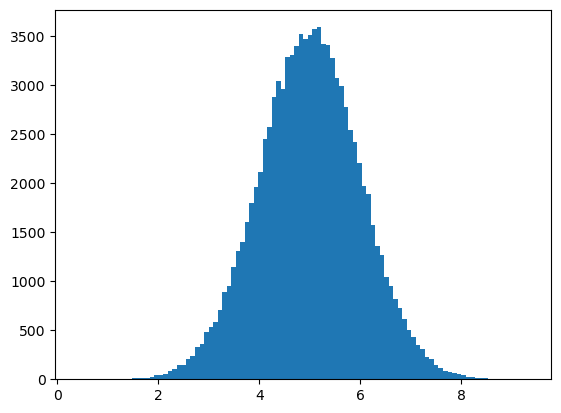

In [17]:
arr2 = np.random.normal(5.0, 1.0, 100000) #random array of 1000000 values centered around 5 with standard deviation 1
plt.hist(arr2, 100)
plt.show()

# Linear Regression

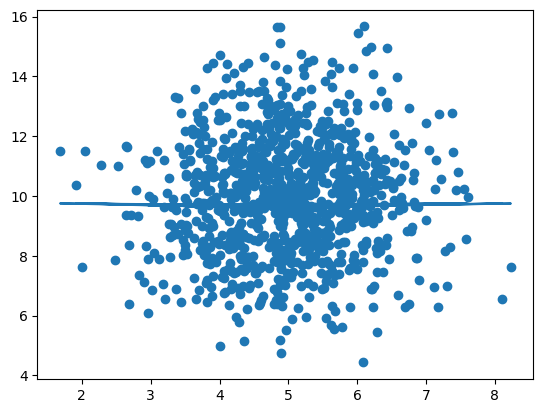

r = 0.03237195069758374


In [18]:
arr3 = np.random.normal(5.0, 1.0, 1000)
arr4 = np.random.normal(10.0, 2.0, 1000)


slope, intercept, r, p, std_err = stats.linregress(arr3, arr4) #the values of this line are fed by stats.linregress(arr3, arr4) and each have a separate value

def someFunc(arr3):
    return np.sin(arr3) * slope + intercept

simpleModel = list(map(someFunc, arr3))

plt.scatter(arr3, arr4)
plt.plot(arr3, simpleModel)
plt.show()

print("r =", r)

An obscenely low r or rsquared means dataset may not be a fit for the regression you're trying

In [19]:
# Using function to predict values

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print(speed)

85.59308314937454


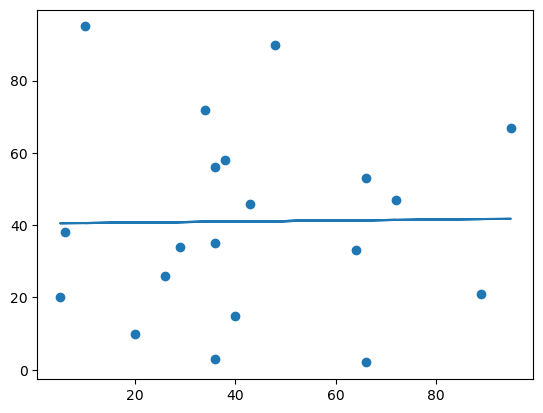

0.01331814154297491


In [20]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(r)

# Polynomial Regression

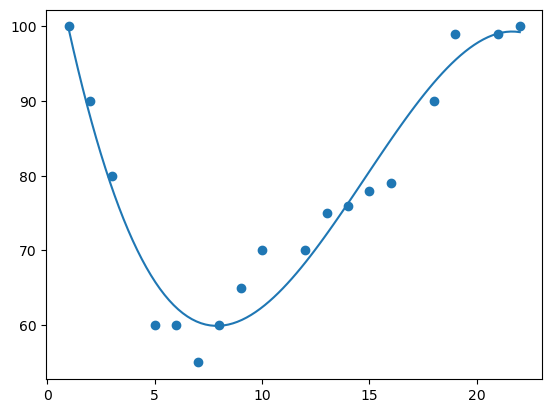

0.9432150416451027
88.87331269697987


In [3]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

polyModel = np.poly1d(np.polyfit(x, y, 3)) #method for creating polynomial model

polyLine = np.linspace(1, 22, 100) #specifies how the line will display, (start, end, something)

plt.scatter(x, y) #draw scatter plot
plt.plot(polyLine, polyModel(polyLine)) #plot line of polynomial regression onto drawn plot
plt.show()
print(r2_score(y, polyModel(x))) #like normal r but btwn 0 and 1 (1 being 100% related)
print(polyModel(17)) #predicted based on polynomial regression on original scatter plot

# Multiple Regression
Like linear regression, but more than one independent value, meaning two or more variables can be predicted

In [14]:
# we'll be using the data.csv I got from w3schools for this

dataFile = df = pandas.read_csv("data.csv")
X = df[['Weight', 'Volume']] #need two brackets because 2D array; this will be our independent variable
y = df['CO2'] #dependent variable

regr = linear_model.LinearRegression() #method to create linear regression object
regr.fit(X, y)

predictedCO2 = regr.predict([[3300, 1300]]) #predicts C02 emission of a car where the weight is 2300 and the volume is 1300
print(predictedCO2)

print(regr.coef_) #coef_ is the relationship with an unknown variable, should print [coefficient value of weight against CO2, coef value of volume against CO2]

[114.75968007]
[0.00755095 0.00780526]


c:\Users\fw2220\Anaconda3\envs\aslPy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Scale
If things are in different units or proportions, and they create errors inside your model, you can scale everything to fit better